<a href="https://colab.research.google.com/github/SStewart92/Datasets/blob/main/Module5_Frequency_Analysis_and_Co_occurrence_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install nltk

In [38]:
pip install networkx matplotlib


In [39]:
import pandas as pd
import nltk

In [40]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/SStewart92/Datasets/main/shopping_trends.csv')

In [42]:
data_shopping = {
    "Order ID": [1, 2, 3, 4, 5],
    "Product": ["Laptop", "Smartphone", "Headphones", "Keyboard", "Mouse"],
    "Quantity": [1, 2, 1, 2, 3],
    "Unit Price": [1000, 500, 20, 50, 10],
}

df = pd.DataFrame(data_shopping)

In [43]:
df.head()

,Order ID,Product,Quantity,Unit Price
0,1,Laptop,1,1000
1,2,Smartphone,2,500
2,3,Headphones,1,20
3,4,Keyboard,2,50
4,5,Mouse,3,10


In [44]:
df.dtypes

Order ID       int64
Product       object
Quantity       int64
Unit Price     int64
dtype: object

**Frequency Analysis**

In [45]:
import pandas as pd
from collections import Counter
import re

# Load the dataset
file_path = 'https://raw.githubusercontent.com/SStewart92/Datasets/main/shopping_trends.csv'
data = pd.read_csv(file_path)

# Specify the textual columns to analyze
text_columns = ['Item Purchased', 'Category', 'Location', 'Color', 'Season', 'Subscription Status',
                'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used',
                'Preferred Payment Method', 'Frequency of Purchases']

# Combine all text from the relevant columns into a single list
text_data = data[text_columns].astype(str).apply(lambda x: ' '.join(x), axis=1).tolist()

# Normalize and tokenize the text
words = [word.lower() for line in text_data for word in re.findall(r'\b\w+\b', line)]

# Count the occurrences of each word
word_counts = Counter(words)

# Get the most common words and their counts
most_common_words = word_counts.most_common(10)

# Print the most common words and their counts
for word, count in most_common_words:
    print(f'"{word}" - {count} occurrences')


"no" - 7293 occurrences
"yes" - 4407 occurrences
"card" - 2636 occurrences
"clothing" - 1737 occurrences
"credit" - 1367 occurrences
"cash" - 1318 occurrences
"paypal" - 1315 occurrences
"shipping" - 1302 occurrences
"venmo" - 1287 occurrences
"day" - 1275 occurrences


**Co-occurrence Analysis**

In [46]:
from itertools import combinations

# Function to clean and tokenize text
def tokenize(text):
    # Convert to lowercase and tokenize
    return re.findall(r'\b\w+\b', text.lower())

# Function to find and count word pairs
def find_word_pairs(series):
    pairs_list = []
    for text in series:
        words = tokenize(text)
        # Generate all unique pairs for each list of words and sort each pair to avoid duplicates like ('a', 'b') and ('b', 'a')
        pairs = combinations(sorted(set(words)), 2)
        pairs_list.extend(pairs)
    return Counter(pairs_list)

# Assuming 'Item Purchased' and 'Color' are columns of interest
# You can concatenate text from multiple columns if needed
text_series = data['Item Purchased'] + ' ' + data['Color']

# Find and count word pairs
word_pairs = find_word_pairs(text_series)

# Get the 10 most common word pairs
most_common_pairs = word_pairs.most_common(10)

# Print the most common word pairs
for pair, count in most_common_pairs:
    print(f'{pair}: {count}')

('shirt', 't'): 147
('shirt', 'violet'): 20
('maroon', 'shirt'): 19
('orange', 'shirt'): 19
('shirt', 'silver'): 17
('shirt', 'white'): 15
('black', 'skirt'): 15
('gray', 'jewelry'): 14
('black', 'shirt'): 14
('gray', 'shirt'): 13


**Visualization**

In [47]:
print(type(most_common_pairs))

<class 'list'>


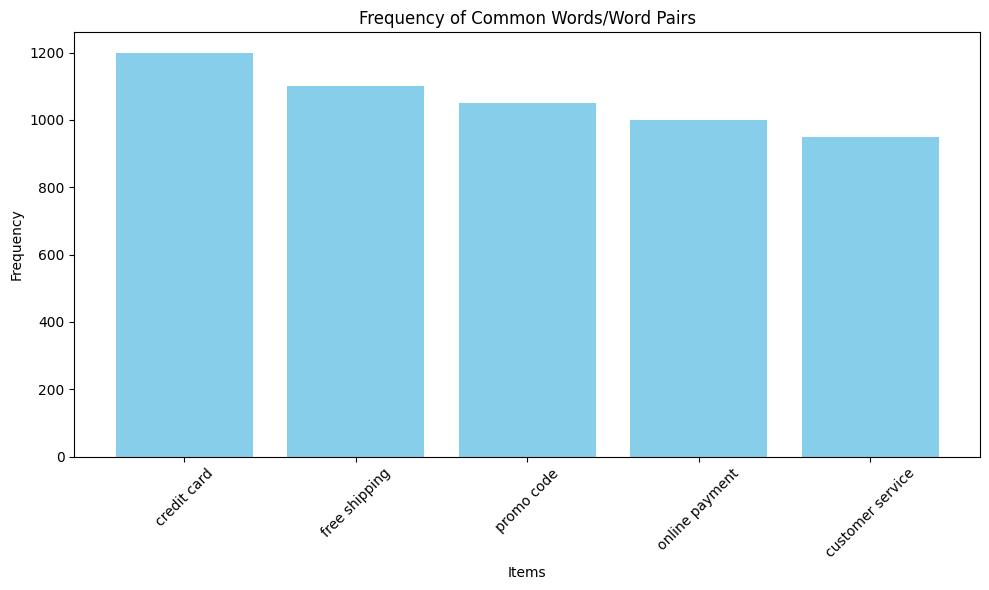

In [48]:
import matplotlib.pyplot as plt

# Data
items = ['credit card', 'free shipping', 'promo code', 'online payment', 'customer service']
frequencies = [1200, 1100, 1050, 1000, 950]

# Creating the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(items, frequencies, color='skyblue')  # Create a bar chart

plt.xlabel('Items')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.title('Frequency of Common Words/Word Pairs')  # Chart title
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the bar chart
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
plt.show()
